In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gta_sa_vehicle_stats.csv')
pd.set_option('display.max_columns', None)
df

,Identifier,Mass (kg),Turn Mass (kg),Drag Multiplier,Center Of Mass,Center Of Mass.1,Center Of Mass.2,Center Of Mass.3,Traction,Traction.1,Traction.2,Transmission,Transmission.1,Transmission.2,Transmission.3,Transmission.4,Transmission.5,Brakes,Brakes.1,Brakes.2,Steering Lock (°),Suspension,Suspension.1,Suspension.2,Suspension Lines,Suspension Lines.1,Suspension Lines.2,Suspension anti-dive multiplier,Seat offset distance,Collision damage multiplier,Monetary Value ($),Model flags,Handling flags,Lights,Lights.1,Lights.2
0,Identifier,Mass (kg),Turn Mass (kg),Drag Multiplier,x,y,z,% submerged,Multiplier,Loss,Bias (%),# of gears,Max velocity (km/h),Acceleration (ms^2),Inertia,Drive type,Engine type,Deceleration (ms^2),Bias (%),ABS,Steering Lock (°),Force level,Damping level,High speed com damping,Upper limit,Lower limit,Bias between front and rear,Suspension anti-dive multiplier,Seat offset distance,Collision damage multiplier,Monetary Value ($),Model flags,Handling flags,Front,Rear,Anim group
1,LANDSTAL,1700.0,5008.3,2.5,0.0,0.0,-0.3,85,0.75,0.85,0.5,5,160.0,25.0,20.0,4,D,6.2,0.6,0,35.0,2.4,0.08,0.0,0.28,-0.14,0.5,0.25,0.27,0.23,25000,20,500002,0,1,0.0
2,BRAVURA,1300.0,2200.0,1.7,0.0,0.3,0.0,70,0.65,0.8,0.52,9,300.0,15.0,10.0,Front,Petrol,8.0,0.8,0,30.0,1.3,0.08,0.0,0.31,-0.15,0.57,0.0,0.26,0.5,9000,1,1,Long,Long,0.0
3,BUFFALO,1500.0,4000.0,2.0,0.0,0.0,-0.1,85,0.7,0.9,0.5,9,300.0,28.0,5.0,Rear,Petrol,11.0,0.45,0,30.0,1.2,0.12,0.0,0.28,-0.24,0.5,0.4,0.25,0.5,35000,2800,10200000,Small,Small,0.0
4,LINERUN,3800.0,19953.2,5.0,0.0,0.0,-0.2,90,0.95,0.65,0.4,9,200.0,25.0,30.0,Rear,Diesel,8.0,0.3,0,25.0,1.6,0.06,0.0,0.4,-0.2,0.5,0.0,0.65,0.25,35000,6000,200,Long,Small,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,STAIRS,1000.0,2500.0,5.0,0.0,0.4,-0.2,70,1.0,0.85,0.5,3,160.0,20.0,30.0,Rear,Electric,5.0,0.5,0,30.0,2.0,0.09,0.0,0.25,-0.1,0.5,0.0,0.26,0.5,9000,3100,4,Small,Small,0.0
159,BOXBURG,5500.0,23489.6,3.0,0.0,0.0,0.0,80,0.82,0.7,0.46,5,140.0,14.0,25.0,Rear,Diesel,4.5,0.6,0,30.0,0.9,0.08,0.0,0.25,-0.25,0.35,0.6,0.36,0.4,22000,4009,201,Long,Tall,13.0
160,FARM_TR1,400.0,400.0,5.0,0.0,-0.4,0.0,70,0.6,0.85,0.5,3,160.0,20.0,30.0,Rear,Electric,5.0,0.5,0,30.0,1.0,0.1,0.0,0.25,-0.1,0.5,0.0,0.26,0.5,9000,3100,4,Small,Small,0.0
161,UTIL_TR1,1000.0,1354.2,5.0,0.0,0.0,0.0,70,1.0,0.85,0.5,3,160.0,20.0,30.0,Rear,Electric,5.0,0.5,0,30.0,2.0,0.09,0.0,0.25,-0.1,0.5,0.0,0.26,0.5,9000,3100,4,Small,Small,0.0


In [3]:
df.columns = [c.lower().replace(' ', '_') for c in df.columns]

In [4]:
df

,identifier,mass_(kg),turn_mass_(kg),drag_multiplier,center_of_mass,center_of_mass.1,center_of_mass.2,center_of_mass.3,traction,traction.1,traction.2,transmission,transmission.1,transmission.2,transmission.3,transmission.4,transmission.5,brakes,brakes.1,brakes.2,steering_lock_(°),suspension,suspension.1,suspension.2,suspension_lines,suspension_lines.1,suspension_lines.2,suspension_anti-dive_multiplier,seat_offset_distance,collision_damage_multiplier,monetary_value_($),model_flags,handling_flags,lights,lights.1,lights.2
0,Identifier,Mass (kg),Turn Mass (kg),Drag Multiplier,x,y,z,% submerged,Multiplier,Loss,Bias (%),# of gears,Max velocity (km/h),Acceleration (ms^2),Inertia,Drive type,Engine type,Deceleration (ms^2),Bias (%),ABS,Steering Lock (°),Force level,Damping level,High speed com damping,Upper limit,Lower limit,Bias between front and rear,Suspension anti-dive multiplier,Seat offset distance,Collision damage multiplier,Monetary Value ($),Model flags,Handling flags,Front,Rear,Anim group
1,LANDSTAL,1700.0,5008.3,2.5,0.0,0.0,-0.3,85,0.75,0.85,0.5,5,160.0,25.0,20.0,4,D,6.2,0.6,0,35.0,2.4,0.08,0.0,0.28,-0.14,0.5,0.25,0.27,0.23,25000,20,500002,0,1,0.0
2,BRAVURA,1300.0,2200.0,1.7,0.0,0.3,0.0,70,0.65,0.8,0.52,9,300.0,15.0,10.0,Front,Petrol,8.0,0.8,0,30.0,1.3,0.08,0.0,0.31,-0.15,0.57,0.0,0.26,0.5,9000,1,1,Long,Long,0.0
3,BUFFALO,1500.0,4000.0,2.0,0.0,0.0,-0.1,85,0.7,0.9,0.5,9,300.0,28.0,5.0,Rear,Petrol,11.0,0.45,0,30.0,1.2,0.12,0.0,0.28,-0.24,0.5,0.4,0.25,0.5,35000,2800,10200000,Small,Small,0.0
4,LINERUN,3800.0,19953.2,5.0,0.0,0.0,-0.2,90,0.95,0.65,0.4,9,200.0,25.0,30.0,Rear,Diesel,8.0,0.3,0,25.0,1.6,0.06,0.0,0.4,-0.2,0.5,0.0,0.65,0.25,35000,6000,200,Long,Small,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,STAIRS,1000.0,2500.0,5.0,0.0,0.4,-0.2,70,1.0,0.85,0.5,3,160.0,20.0,30.0,Rear,Electric,5.0,0.5,0,30.0,2.0,0.09,0.0,0.25,-0.1,0.5,0.0,0.26,0.5,9000,3100,4,Small,Small,0.0
159,BOXBURG,5500.0,23489.6,3.0,0.0,0.0,0.0,80,0.82,0.7,0.46,5,140.0,14.0,25.0,Rear,Diesel,4.5,0.6,0,30.0,0.9,0.08,0.0,0.25,-0.25,0.35,0.6,0.36,0.4,22000,4009,201,Long,Tall,13.0
160,FARM_TR1,400.0,400.0,5.0,0.0,-0.4,0.0,70,0.6,0.85,0.5,3,160.0,20.0,30.0,Rear,Electric,5.0,0.5,0,30.0,1.0,0.1,0.0,0.25,-0.1,0.5,0.0,0.26,0.5,9000,3100,4,Small,Small,0.0
161,UTIL_TR1,1000.0,1354.2,5.0,0.0,0.0,0.0,70,1.0,0.85,0.5,3,160.0,20.0,30.0,Rear,Electric,5.0,0.5,0,30.0,2.0,0.09,0.0,0.25,-0.1,0.5,0.0,0.26,0.5,9000,3100,4,Small,Small,0.0


In [5]:
df = df.rename(columns={
    "center_of_mass": "center_of_mass_x",
    "center_of_mass.1": "center_of_mass_y",
    "center_of_mass.2": "center_of_mass_z",
    "center_of_mass.3": "center_of_mass_%submerged",
    "traction": "traction_multiplier",
    "traction.1": "traction_loss",
    "traction.2": "traction_bias(%)",
    "transmission": "#_of_gears",
    "transmission.1": "max_velocity(km/h)",
    "transmission.2": "acceleration(ms^2)",
    "transmission.3": "interia",
    "transmission.4": "drive_type",
    "transmission.5": "engine_type",
    "brakes": "brakes_deceleration(ms^2)",
    "brakes.1": "brakes_bias(%)",
    "brakes.2": "abs",
    "suspension": "suspension_force_level",
    "suspension.1": "suspension_damping_level",
    "suspension.2": "suspension_high_speed_com_damping",
    "suspension_lines": "suspension_lines_upper_limit",
    "suspension_lines.1": "suspension_lines_lower_limit",
    "suspension_lines.2": "suspension_lines_bias_between_front_and_rear",
    "lights": "lights_front",
    "lights.1": "lights_rear",
    "lights.2": "lights_anim_group",

})

In [6]:
df = df.iloc[1:].reset_index(drop=True)
df

,identifier,mass_(kg),turn_mass_(kg),drag_multiplier,center_of_mass_x,center_of_mass_y,center_of_mass_z,center_of_mass_%submerged,traction_multiplier,traction_loss,traction_bias(%),#_of_gears,max_velocity(km/h),acceleration(ms^2),interia,drive_type,engine_type,brakes_deceleration(ms^2),brakes_bias(%),abs,steering_lock_(°),suspension_force_level,suspension_damping_level,suspension_high_speed_com_damping,suspension_lines_upper_limit,suspension_lines_lower_limit,suspension_lines_bias_between_front_and_rear,suspension_anti-dive_multiplier,seat_offset_distance,collision_damage_multiplier,monetary_value_($),model_flags,handling_flags,lights_front,lights_rear,lights_anim_group
0,LANDSTAL,1700.0,5008.3,2.5,0.0,0.0,-0.3,85,0.75,0.85,0.5,5,160.0,25.0,20.0,4,D,6.2,0.6,0,35.0,2.4,0.08,0.0,0.28,-0.14,0.5,0.25,0.27,0.23,25000,20,500002,0,1,0.0
1,BRAVURA,1300.0,2200.0,1.7,0.0,0.3,0.0,70,0.65,0.8,0.52,9,300.0,15.0,10.0,Front,Petrol,8.0,0.8,0,30.0,1.3,0.08,0.0,0.31,-0.15,0.57,0.0,0.26,0.5,9000,1,1,Long,Long,0.0
2,BUFFALO,1500.0,4000.0,2.0,0.0,0.0,-0.1,85,0.7,0.9,0.5,9,300.0,28.0,5.0,Rear,Petrol,11.0,0.45,0,30.0,1.2,0.12,0.0,0.28,-0.24,0.5,0.4,0.25,0.5,35000,2800,10200000,Small,Small,0.0
3,LINERUN,3800.0,19953.2,5.0,0.0,0.0,-0.2,90,0.95,0.65,0.4,9,200.0,25.0,30.0,Rear,Diesel,8.0,0.3,0,25.0,1.6,0.06,0.0,0.4,-0.2,0.5,0.0,0.65,0.25,35000,6000,200,Long,Small,2.0
4,PEREN,1200.0,3000.0,2.5,0.0,0.1,0.0,70,0.7,0.9,0.48,9,300.0,18.0,20.0,Front,Petrol,4.0,0.8,0,30.0,1.4,0.1,0.0,0.37,-0.17,0.5,0.0,0.2,0.6,10000,20,0,Small,Small,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,STAIRS,1000.0,2500.0,5.0,0.0,0.4,-0.2,70,1.0,0.85,0.5,3,160.0,20.0,30.0,Rear,Electric,5.0,0.5,0,30.0,2.0,0.09,0.0,0.25,-0.1,0.5,0.0,0.26,0.5,9000,3100,4,Small,Small,0.0
158,BOXBURG,5500.0,23489.6,3.0,0.0,0.0,0.0,80,0.82,0.7,0.46,5,140.0,14.0,25.0,Rear,Diesel,4.5,0.6,0,30.0,0.9,0.08,0.0,0.25,-0.25,0.35,0.6,0.36,0.4,22000,4009,201,Long,Tall,13.0
159,FARM_TR1,400.0,400.0,5.0,0.0,-0.4,0.0,70,0.6,0.85,0.5,3,160.0,20.0,30.0,Rear,Electric,5.0,0.5,0,30.0,1.0,0.1,0.0,0.25,-0.1,0.5,0.0,0.26,0.5,9000,3100,4,Small,Small,0.0
160,UTIL_TR1,1000.0,1354.2,5.0,0.0,0.0,0.0,70,1.0,0.85,0.5,3,160.0,20.0,30.0,Rear,Electric,5.0,0.5,0,30.0,2.0,0.09,0.0,0.25,-0.1,0.5,0.0,0.26,0.5,9000,3100,4,Small,Small,0.0


Save this cleared version

In [7]:
#df.to_csv('gta_sa_vehicle_stats_cleared.csv', index=False)

In [8]:
df[df.isnull().any(axis=1)]

,identifier,mass_(kg),turn_mass_(kg),drag_multiplier,center_of_mass_x,center_of_mass_y,center_of_mass_z,center_of_mass_%submerged,traction_multiplier,traction_loss,traction_bias(%),#_of_gears,max_velocity(km/h),acceleration(ms^2),interia,drive_type,engine_type,brakes_deceleration(ms^2),brakes_bias(%),abs,steering_lock_(°),suspension_force_level,suspension_damping_level,suspension_high_speed_com_damping,suspension_lines_upper_limit,suspension_lines_lower_limit,suspension_lines_bias_between_front_and_rear,suspension_anti-dive_multiplier,seat_offset_distance,collision_damage_multiplier,monetary_value_($),model_flags,handling_flags,lights_front,lights_rear,lights_anim_group
48,YANKEE,4500.0,18003.7,3.0,0.0,0.0,0.0,80,0.55,0.7,0.48,5,160.0,14.0,40.0,Rear,Diesel,4.5,0.8,0,30.0,1.8,0.12,0.0,0.3,-0.25,0.5,0.0,0.35,0.45,22000,4088,0,Small,Long,NaN


In [9]:
df['lights_anim_group'] = df['lights_anim_group'].fillna(0)

In [10]:
df.isnull().sum().sum()

np.int64(0)

In [11]:
df['max_velocity(km/h)'] = df['max_velocity(km/h)'].replace('300.0', '200.0')

In [12]:
# New values as dictionary
correct_values = {
    'STRETCH': '140.0',
    'BRAVURA': '144.0',
    'LINERUN': '160.0',
    'TRASH': '170.0',
    'MANANA': '160.0',
    'DUMPER': '110.0',
    'FIRETRUK': '170.0',
    'URANUS': '180.0',
    'PEREN': '150.0',
    'SENTINEL': '165.0'
}

# Actualisation 'max_velocity(km/h)'
for vehicle, speed in correct_values.items():
    df.loc[df['identifier'] == vehicle, 'max_velocity(km/h)'] = speed

In [13]:
df

,identifier,mass_(kg),turn_mass_(kg),drag_multiplier,center_of_mass_x,center_of_mass_y,center_of_mass_z,center_of_mass_%submerged,traction_multiplier,traction_loss,traction_bias(%),#_of_gears,max_velocity(km/h),acceleration(ms^2),interia,drive_type,engine_type,brakes_deceleration(ms^2),brakes_bias(%),abs,steering_lock_(°),suspension_force_level,suspension_damping_level,suspension_high_speed_com_damping,suspension_lines_upper_limit,suspension_lines_lower_limit,suspension_lines_bias_between_front_and_rear,suspension_anti-dive_multiplier,seat_offset_distance,collision_damage_multiplier,monetary_value_($),model_flags,handling_flags,lights_front,lights_rear,lights_anim_group
0,LANDSTAL,1700.0,5008.3,2.5,0.0,0.0,-0.3,85,0.75,0.85,0.5,5,160.0,25.0,20.0,4,D,6.2,0.6,0,35.0,2.4,0.08,0.0,0.28,-0.14,0.5,0.25,0.27,0.23,25000,20,500002,0,1,0.0
1,BRAVURA,1300.0,2200.0,1.7,0.0,0.3,0.0,70,0.65,0.8,0.52,9,144.0,15.0,10.0,Front,Petrol,8.0,0.8,0,30.0,1.3,0.08,0.0,0.31,-0.15,0.57,0.0,0.26,0.5,9000,1,1,Long,Long,0.0
2,BUFFALO,1500.0,4000.0,2.0,0.0,0.0,-0.1,85,0.7,0.9,0.5,9,200.0,28.0,5.0,Rear,Petrol,11.0,0.45,0,30.0,1.2,0.12,0.0,0.28,-0.24,0.5,0.4,0.25,0.5,35000,2800,10200000,Small,Small,0.0
3,LINERUN,3800.0,19953.2,5.0,0.0,0.0,-0.2,90,0.95,0.65,0.4,9,160.0,25.0,30.0,Rear,Diesel,8.0,0.3,0,25.0,1.6,0.06,0.0,0.4,-0.2,0.5,0.0,0.65,0.25,35000,6000,200,Long,Small,2.0
4,PEREN,1200.0,3000.0,2.5,0.0,0.1,0.0,70,0.7,0.9,0.48,9,150.0,18.0,20.0,Front,Petrol,4.0,0.8,0,30.0,1.4,0.1,0.0,0.37,-0.17,0.5,0.0,0.2,0.6,10000,20,0,Small,Small,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,STAIRS,1000.0,2500.0,5.0,0.0,0.4,-0.2,70,1.0,0.85,0.5,3,160.0,20.0,30.0,Rear,Electric,5.0,0.5,0,30.0,2.0,0.09,0.0,0.25,-0.1,0.5,0.0,0.26,0.5,9000,3100,4,Small,Small,0.0
158,BOXBURG,5500.0,23489.6,3.0,0.0,0.0,0.0,80,0.82,0.7,0.46,5,140.0,14.0,25.0,Rear,Diesel,4.5,0.6,0,30.0,0.9,0.08,0.0,0.25,-0.25,0.35,0.6,0.36,0.4,22000,4009,201,Long,Tall,13.0
159,FARM_TR1,400.0,400.0,5.0,0.0,-0.4,0.0,70,0.6,0.85,0.5,3,160.0,20.0,30.0,Rear,Electric,5.0,0.5,0,30.0,1.0,0.1,0.0,0.25,-0.1,0.5,0.0,0.26,0.5,9000,3100,4,Small,Small,0.0
160,UTIL_TR1,1000.0,1354.2,5.0,0.0,0.0,0.0,70,1.0,0.85,0.5,3,160.0,20.0,30.0,Rear,Electric,5.0,0.5,0,30.0,2.0,0.09,0.0,0.25,-0.1,0.5,0.0,0.26,0.5,9000,3100,4,Small,Small,0.0


In [14]:
#df.to_csv('gta_sa_vehicle_stats_ready.csv', index=False)

EDA:

In [15]:
df.dtypes

identifier                                      object
mass_(kg)                                       object
turn_mass_(kg)                                  object
drag_multiplier                                 object
center_of_mass_x                                object
center_of_mass_y                                object
center_of_mass_z                                object
center_of_mass_%submerged                       object
traction_multiplier                             object
traction_loss                                   object
traction_bias(%)                                object
#_of_gears                                      object
max_velocity(km/h)                              object
acceleration(ms^2)                              object
interia                                         object
drive_type                                      object
engine_type                                     object
brakes_deceleration(ms^2)                       object
brakes_bia

In [16]:
for c in df.columns:
    if c not in ['identifier', 'drive_type', 'engine_type', 'model_flags', 'handling_flags', 'lights_front', 'lights_rear']:
        df[c] = pd.to_numeric(df[c])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   identifier                                    162 non-null    object 
 1   mass_(kg)                                     162 non-null    float64
 2   turn_mass_(kg)                                162 non-null    float64
 3   drag_multiplier                               162 non-null    float64
 4   center_of_mass_x                              162 non-null    float64
 5   center_of_mass_y                              162 non-null    float64
 6   center_of_mass_z                              162 non-null    float64
 7   center_of_mass_%submerged                     162 non-null    int64  
 8   traction_multiplier                           162 non-null    float64
 9   traction_loss                                 162 non-null    flo

In [18]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
identifier,162,162,LANDSTAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mass_(kg),162.0,NaN,NaN,NaN,2964.506173,3493.732997,100.0,1412.5,1775.0,3500.0,25500.0
turn_mass_(kg),162.0,NaN,NaN,NaN,13925.076543,29343.371204,24.1,3066.95,4350.0,10917.85,250000.0
drag_multiplier,162.0,NaN,NaN,NaN,2.828395,2.166557,1.0,2.0,2.2,3.0,20.0
center_of_mass_x,162.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
center_of_mass_y,162.0,NaN,NaN,NaN,0.041975,0.191181,-0.8,0.0,0.0,0.1,0.5
center_of_mass_z,162.0,NaN,NaN,NaN,-0.117222,0.155421,-0.6,-0.2,-0.1,0.0,0.3
center_of_mass_%submerged,162.0,NaN,NaN,NaN,77.962963,7.931296,50.0,70.0,75.0,85.0,110.0
traction_multiplier,162.0,NaN,NaN,NaN,0.719815,0.18091,0.45,0.65,0.7,0.75,2.5
traction_loss,162.0,NaN,NaN,NaN,0.808333,0.063356,0.65,0.8,0.8,0.85,0.92


In [19]:
df.select_dtypes(include='object')

,identifier,drive_type,engine_type,model_flags,handling_flags,lights_front,lights_rear
0,LANDSTAL,4,D,20,500002,0,1
1,BRAVURA,Front,Petrol,1,1,Long,Long
2,BUFFALO,Rear,Petrol,2800,10200000,Small,Small
3,LINERUN,Rear,Diesel,6000,200,Long,Small
4,PEREN,Front,Petrol,20,0,Small,Small
...,...,...,...,...,...,...,...
157,STAIRS,Rear,Electric,3100,4,Small,Small
158,BOXBURG,Rear,Diesel,4009,201,Long,Tall
159,FARM_TR1,Rear,Electric,3100,4,Small,Small
160,UTIL_TR1,Rear,Electric,3100,4,Small,Small


In [20]:
df.select_dtypes(include='object').nunique()

identifier        162
drive_type          4
engine_type         4
model_flags        76
handling_flags     68
lights_front        4
lights_rear         6
dtype: int64

In [21]:
for c in df.select_dtypes(include='object').columns:
    if c not in ['identifier', 'model_flags', 'handling_flags']:
        print(f'Unique Values in "{c}":', df[c].unique())

Unique Values in "drive_type": ['4' 'Front' 'Rear' 'R']
Unique Values in "engine_type": ['D' 'Petrol' 'Diesel' 'Electric']
Unique Values in "lights_front": ['0' 'Long' 'Small' 'Big']
Unique Values in "lights_rear": ['1' 'Long' 'Small' 'Tall' 'Big' '3']


In [22]:
df['drive_type'] = df['drive_type'].replace('R', 'Rear')
df['engine_type'] = df['engine_type'].replace('D', 'Diesel')

In [23]:
for c in ['drive_type', 'engine_type']:
    print(f'Unique Values in {c}:', df[c].unique())

Unique Values in drive_type: ['4' 'Front' 'Rear']
Unique Values in engine_type: ['Diesel' 'Petrol' 'Electric']


In [24]:
df['drive_type'] = df['drive_type'].astype('category')
df['engine_type'] = df['engine_type'].astype('category')

In [25]:
df.select_dtypes(include='category')

,drive_type,engine_type
0,4,Diesel
1,Front,Petrol
2,Rear,Petrol
3,Rear,Diesel
4,Front,Petrol
...,...,...
157,Rear,Electric
158,Rear,Diesel
159,Rear,Electric
160,Rear,Electric


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   identifier                                    162 non-null    object  
 1   mass_(kg)                                     162 non-null    float64 
 2   turn_mass_(kg)                                162 non-null    float64 
 3   drag_multiplier                               162 non-null    float64 
 4   center_of_mass_x                              162 non-null    float64 
 5   center_of_mass_y                              162 non-null    float64 
 6   center_of_mass_z                              162 non-null    float64 
 7   center_of_mass_%submerged                     162 non-null    int64   
 8   traction_multiplier                           162 non-null    float64 
 9   traction_loss                                 162 non-

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mass_(kg),162.0,2964.506173,3493.732997,100.00,1412.50,1775.00,3500.0000,25500.00
turn_mass_(kg),162.0,13925.076543,29343.371204,24.10,3066.95,4350.00,10917.8500,250000.00
drag_multiplier,162.0,2.828395,2.166557,1.00,2.00,2.20,3.0000,20.00
center_of_mass_x,162.0,0.000000,0.000000,0.00,0.00,0.00,0.0000,0.00
center_of_mass_y,162.0,0.041975,0.191181,-0.80,0.00,0.00,0.1000,0.50
center_of_mass_z,162.0,-0.117222,0.155421,-0.60,-0.20,-0.10,0.0000,0.30
center_of_mass_%submerged,162.0,77.962963,7.931296,50.00,70.00,75.00,85.0000,110.00
traction_multiplier,162.0,0.719815,0.180910,0.45,0.65,0.70,0.7500,2.50
traction_loss,162.0,0.808333,0.063356,0.65,0.80,0.80,0.8500,0.92
traction_bias(%),162.0,0.495432,0.036014,0.35,0.48,0.50,0.5200,0.60


In [28]:
#histplots

In [29]:
df.columns

Index(['identifier', 'mass_(kg)', 'turn_mass_(kg)', 'drag_multiplier',
       'center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z',
       'center_of_mass_%submerged', 'traction_multiplier', 'traction_loss',
       'traction_bias(%)', '#_of_gears', 'max_velocity(km/h)',
       'acceleration(ms^2)', 'interia', 'drive_type', 'engine_type',
       'brakes_deceleration(ms^2)', 'brakes_bias(%)', 'abs',
       'steering_lock_(°)', 'suspension_force_level',
       'suspension_damping_level', 'suspension_high_speed_com_damping',
       'suspension_lines_upper_limit', 'suspension_lines_lower_limit',
       'suspension_lines_bias_between_front_and_rear',
       'suspension_anti-dive_multiplier', 'seat_offset_distance',
       'collision_damage_multiplier', 'monetary_value_($)', 'model_flags',
       'handling_flags', 'lights_front', 'lights_rear', 'lights_anim_group'],
      dtype='object')

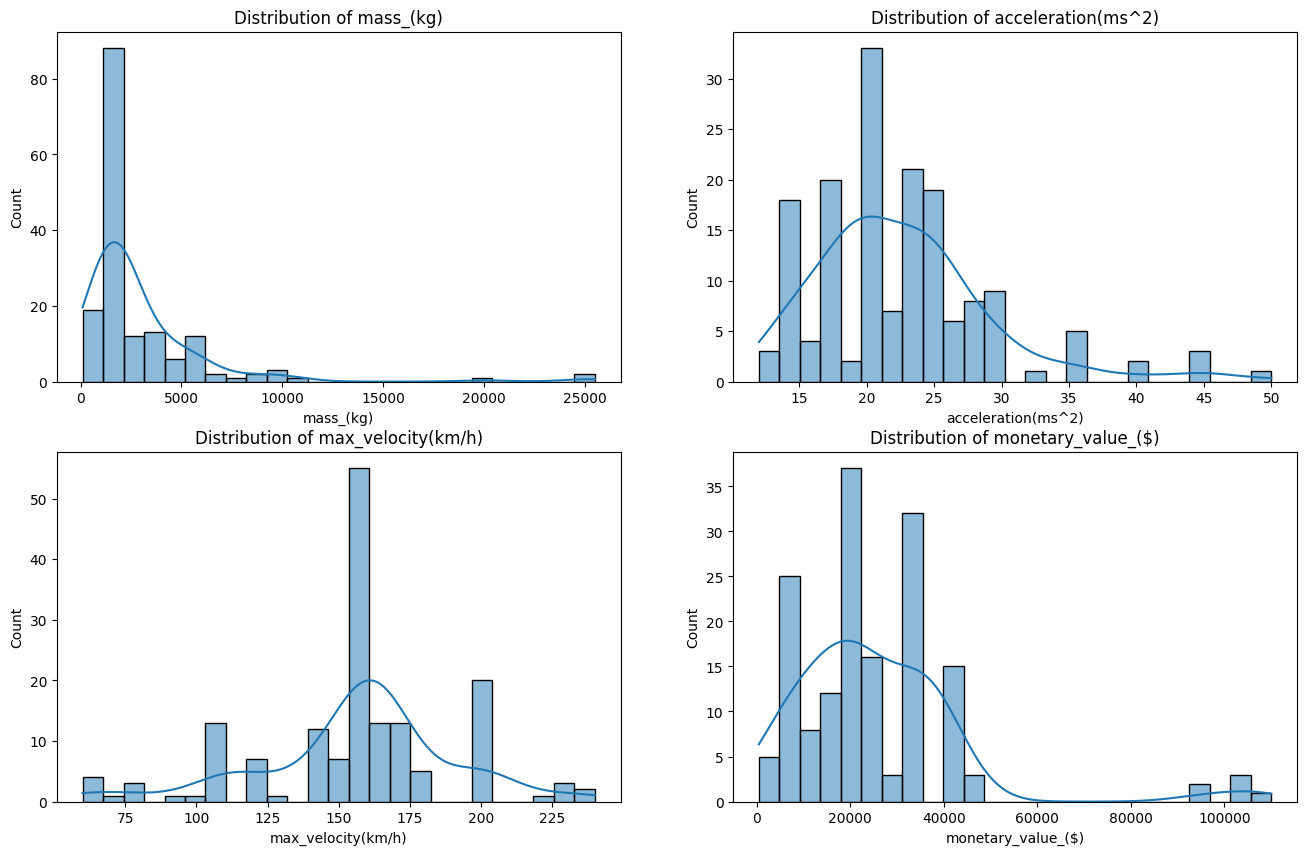

In [30]:
features = ['mass_(kg)', 'acceleration(ms^2)', 'max_velocity(km/h)', 'monetary_value_($)']

plt.figure(figsize=(16, 10))
for i, c in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[c], bins=25, kde=True)
    plt.title(f'Distribution of {c}')

Text(0.5, 1.0, 'Drive Type Distribution')

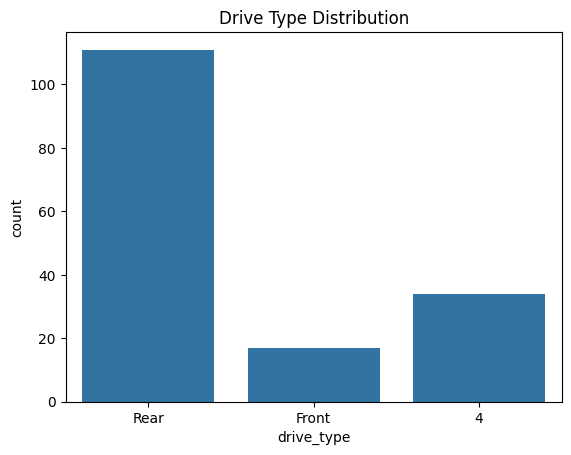

In [31]:
sns.countplot(x=df['drive_type'], order=['Rear', 'Front', '4'])
plt.title('Drive Type Distribution')

Text(0.5, 1.0, 'Engine Type Distribution')

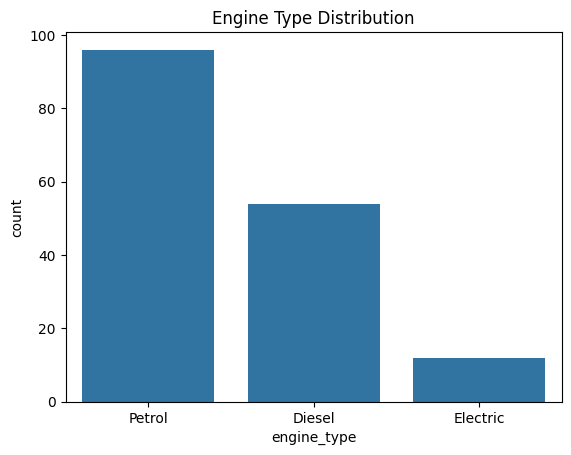

In [32]:
sns.countplot(x=df['engine_type'], order=['Petrol', 'Diesel', 'Electric'])
plt.title('Engine Type Distribution')

Text(0.5, 1.0, 'Acceleration by Drive Type')

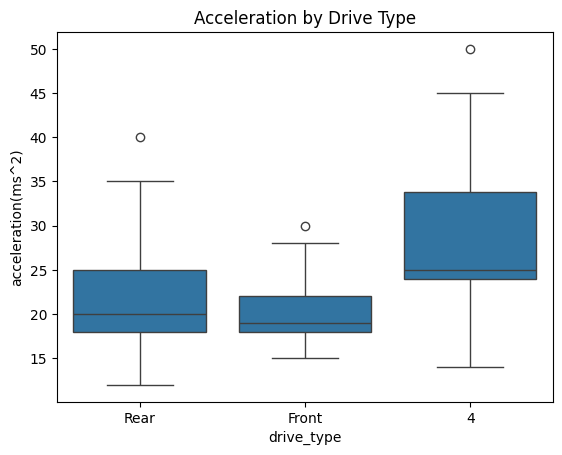

In [33]:
sns.boxplot(x=df['drive_type'], y=df['acceleration(ms^2)'], order=['Rear', 'Front', '4'])
plt.title('Acceleration by Drive Type')

Text(0.5, 1.0, 'Mass vs Acceleration by Drive Type')

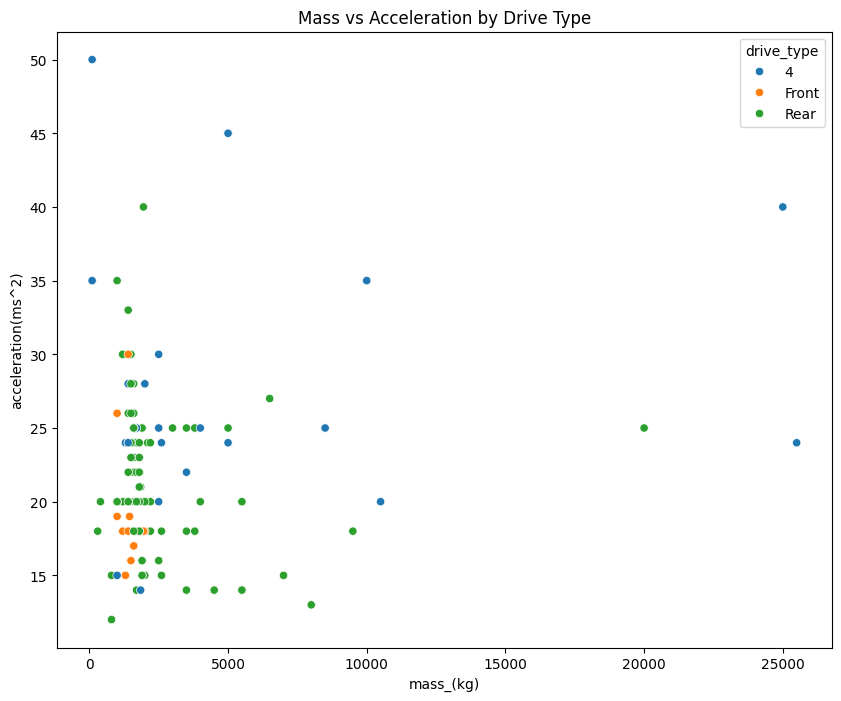

In [34]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='mass_(kg)', y='acceleration(ms^2)', hue='drive_type', data=df)
plt.title('Mass vs Acceleration by Drive Type')

Text(0.5, 1.0, 'Mass vs Acceleration by Drive Type')

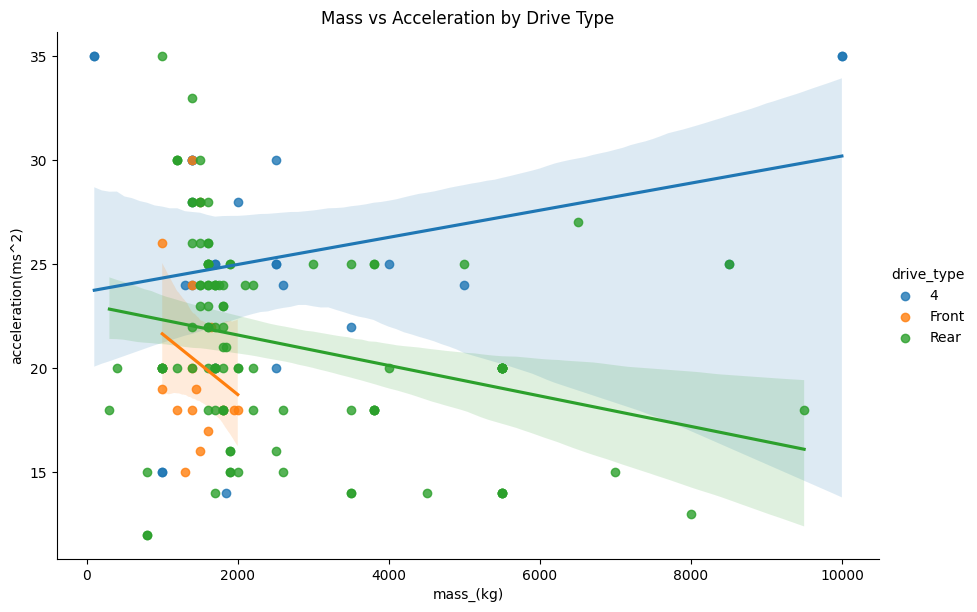

In [35]:
df_filtered = df[(df['mass_(kg)'] <= 10000) & (df['acceleration(ms^2)'] <= 35)]

sns.lmplot(x='mass_(kg)', y='acceleration(ms^2)', hue='drive_type', data=df_filtered, height=6, aspect=1.5)
plt.title('Mass vs Acceleration by Drive Type')

Text(0.5, 1.0, 'Traction vs Brake bias')

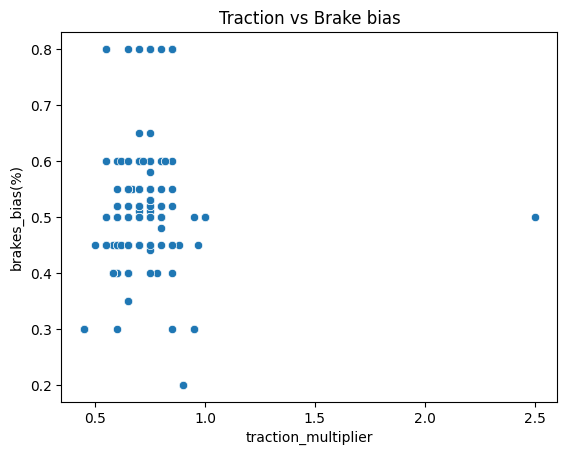

In [36]:
sns.scatterplot(x='traction_multiplier', y='brakes_bias(%)', data=df)
plt.title('Traction vs Brake bias')

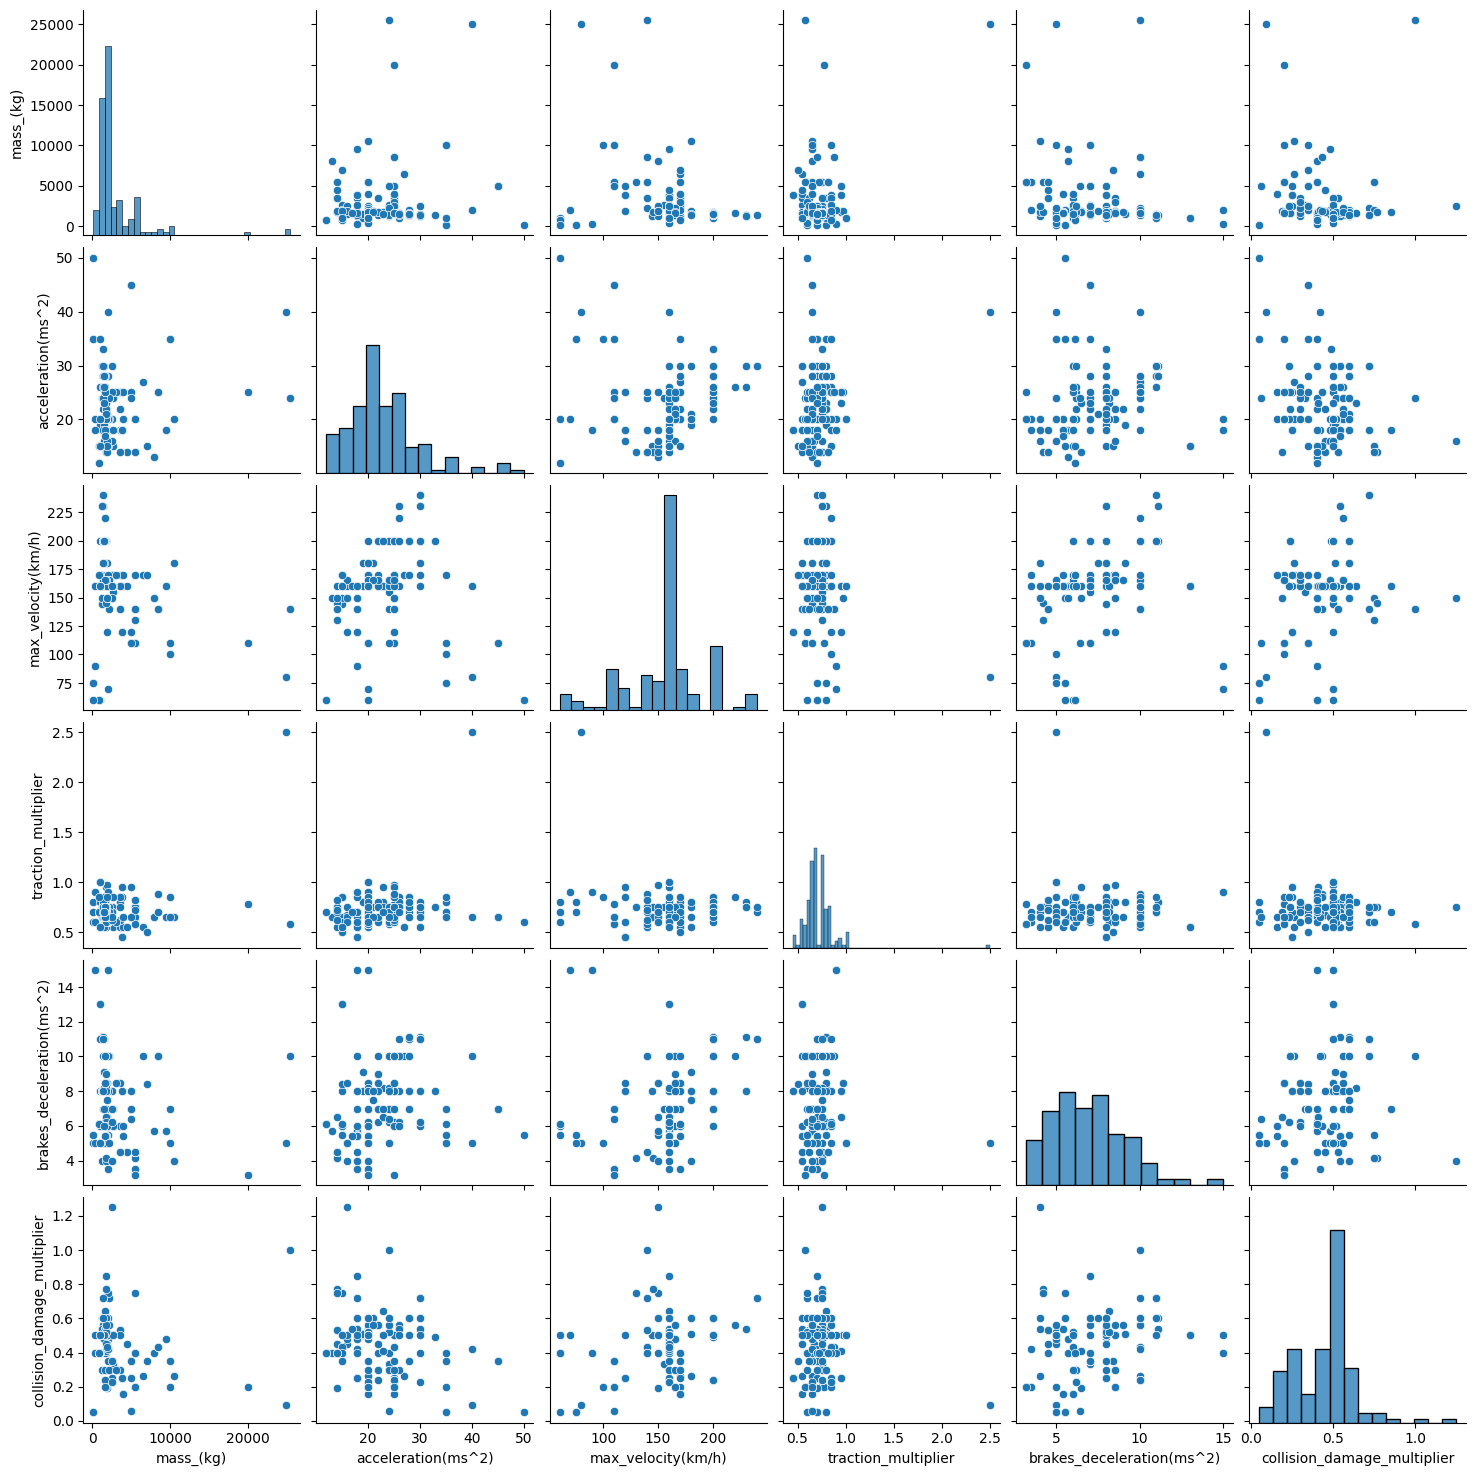

In [37]:
features1 = ['mass_(kg)', 'acceleration(ms^2)', 'max_velocity(km/h)',
            'traction_multiplier', 'brakes_deceleration(ms^2)', 'collision_damage_multiplier']

sns.pairplot(df[features1])

In [38]:
df.columns

Index(['identifier', 'mass_(kg)', 'turn_mass_(kg)', 'drag_multiplier',
       'center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z',
       'center_of_mass_%submerged', 'traction_multiplier', 'traction_loss',
       'traction_bias(%)', '#_of_gears', 'max_velocity(km/h)',
       'acceleration(ms^2)', 'interia', 'drive_type', 'engine_type',
       'brakes_deceleration(ms^2)', 'brakes_bias(%)', 'abs',
       'steering_lock_(°)', 'suspension_force_level',
       'suspension_damping_level', 'suspension_high_speed_com_damping',
       'suspension_lines_upper_limit', 'suspension_lines_lower_limit',
       'suspension_lines_bias_between_front_and_rear',
       'suspension_anti-dive_multiplier', 'seat_offset_distance',
       'collision_damage_multiplier', 'monetary_value_($)', 'model_flags',
       'handling_flags', 'lights_front', 'lights_rear', 'lights_anim_group'],
      dtype='object')

In [39]:
top_speed = df.sort_values(by='max_velocity(km/h)', ascending=False).head(15)
top_speed

,identifier,mass_(kg),turn_mass_(kg),drag_multiplier,center_of_mass_x,center_of_mass_y,center_of_mass_z,center_of_mass_%submerged,traction_multiplier,traction_loss,traction_bias(%),#_of_gears,max_velocity(km/h),acceleration(ms^2),interia,drive_type,engine_type,brakes_deceleration(ms^2),brakes_bias(%),abs,steering_lock_(°),suspension_force_level,suspension_damping_level,suspension_high_speed_com_damping,suspension_lines_upper_limit,suspension_lines_lower_limit,suspension_lines_bias_between_front_and_rear,suspension_anti-dive_multiplier,seat_offset_distance,collision_damage_multiplier,monetary_value_($),model_flags,handling_flags,lights_front,lights_rear,lights_anim_group
11,INFERNUS,1400.0,2725.3,1.5,0.0,0.00,-0.25,70,0.70,0.80,0.50,5,240.0,30.0,10.0,4,Petrol,11.0,0.51,0,30.0,1.2,0.19,0.0,0.25,-0.10,0.50,0.4,0.37,0.72,95000,40002004,C04000,Small,Small,1.0
46,TURISMO,1400.0,3000.0,2.0,0.0,-0.30,-0.20,70,0.75,0.85,0.45,5,240.0,30.0,10.0,4,Petrol,11.0,0.51,0,30.0,1.2,0.13,0.0,0.15,-0.20,0.50,0.4,0.17,0.72,95000,40002004,C08401,Small,Small,1.0
77,SUPERGT,1400.0,2800.0,2.0,0.0,-0.20,-0.24,70,0.75,0.86,0.48,5,230.0,26.0,5.0,Rear,Petrol,8.0,0.52,0,30.0,1.0,0.20,0.0,0.25,-0.10,0.50,0.3,0.40,0.54,105000,40002004,208000,Long,Long,1.0
101,BULLET,1200.0,2500.0,1.8,0.0,-0.15,-0.20,70,0.75,0.90,0.48,5,230.0,30.0,10.0,Rear,Petrol,8.0,0.58,0,30.0,1.0,0.13,5.0,0.25,-0.10,0.45,0.3,0.15,0.54,105000,c0002004,204000,Long,Long,1.0
15,CHEETAH,1200.0,3000.0,2.0,0.0,-0.20,-0.20,70,0.80,0.90,0.50,5,230.0,30.0,10.0,Rear,Petrol,11.1,0.48,0,35.0,0.8,0.20,0.0,0.10,-0.15,0.50,0.6,0.40,0.54,105000,c0002004,208000,Long,Long,1.0
69,HOTRING,1600.0,4500.0,1.4,0.0,0.20,-0.40,70,0.85,0.80,0.48,5,220.0,26.0,5.0,Rear,Petrol,10.0,0.52,0,30.0,1.5,0.10,10.0,0.29,-0.16,0.60,0.4,0.20,0.56,45000,40002004,C00000,Small,Small,0.0
27,BANSHEE,1400.0,3000.0,2.0,0.0,0.00,-0.20,70,0.75,0.89,0.50,5,200.0,33.0,10.0,Rear,Petrol,8.0,0.52,0,34.0,1.6,0.10,5.0,0.30,-0.15,0.50,0.3,0.15,0.49,45000,2004,200000,Small,Small,1.0
31,HOTKNIFE,1400.0,3400.0,2.5,0.0,0.30,-0.30,75,0.75,0.80,0.50,5,200.0,28.0,5.0,Rear,Petrol,11.0,0.45,0,30.0,0.8,0.08,0.0,0.28,-0.20,0.40,0.3,0.20,0.60,35000,40006800,8000,Small,Small,0.0
2,BUFFALO,1500.0,4000.0,2.0,0.0,0.00,-0.10,85,0.70,0.90,0.50,9,200.0,28.0,5.0,Rear,Petrol,11.0,0.45,0,30.0,1.2,0.12,0.0,0.28,-0.24,0.50,0.4,0.25,0.50,35000,2800,10200000,Small,Small,0.0
24,PREMIER,1600.0,3921.3,1.8,0.0,-0.40,0.00,75,0.75,0.85,0.52,5,200.0,22.0,10.0,Rear,Petrol,10.0,0.53,0,35.0,1.3,0.12,0.0,0.28,-0.12,0.38,0.0,0.20,0.24,25000,40000000,10200008,Long,Small,0.0


Text(0.5, 1.0, 'Top 15 Fastest Cars')

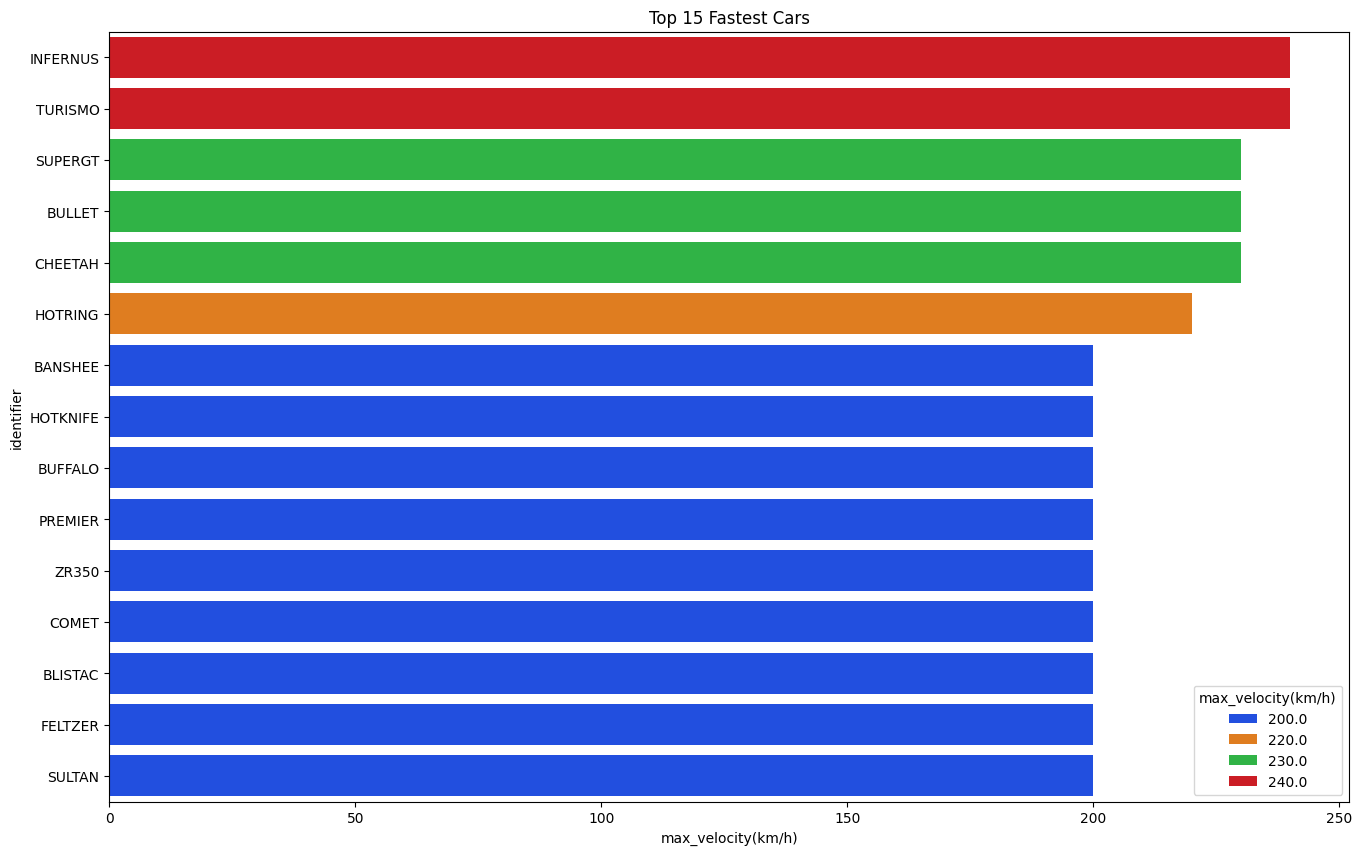

In [40]:
plt.figure(figsize=(16, 10))
sns.barplot(y='identifier', x='max_velocity(km/h)', hue='max_velocity(km/h)', data=top_speed, palette='bright')
plt.title('Top 15 Fastest Cars')

In [41]:
slowest = df.sort_values(by='max_velocity(km/h)', ascending=True).head(15)
slowest

,identifier,mass_(kg),turn_mass_(kg),drag_multiplier,center_of_mass_x,center_of_mass_y,center_of_mass_z,center_of_mass_%submerged,traction_multiplier,traction_loss,traction_bias(%),#_of_gears,max_velocity(km/h),acceleration(ms^2),interia,drive_type,engine_type,brakes_deceleration(ms^2),brakes_bias(%),abs,steering_lock_(°),suspension_force_level,suspension_damping_level,suspension_high_speed_com_damping,suspension_lines_upper_limit,suspension_lines_lower_limit,suspension_lines_bias_between_front_and_rear,suspension_anti-dive_multiplier,seat_offset_distance,collision_damage_multiplier,monetary_value_($),model_flags,handling_flags,lights_front,lights_rear,lights_anim_group
91,FORKLIFT,1000.0,1354.2,2.0,0.0,-0.20,-0.35,70,0.80,0.85,0.50,3,60.0,20.0,15.0,Front,Electric,6.00,0.50,0,30.0,2.0,0.14,0.0,0.25,-0.20,0.50,0.0,0.26,0.50,9000,1300,1040024,Small,Small,0.0
146,RCCAM,100.0,50.0,20.0,0.0,0.05,-0.20,70,0.60,0.90,0.49,1,60.0,50.0,10.0,4,Electric,5.50,0.50,0,25.0,3.0,0.30,0.0,0.15,-0.15,0.50,0.0,0.20,0.05,500,0,1000000,Long,Small,0.0
131,SWEEPER,800.0,632.7,5.0,0.0,0.00,-0.30,80,0.70,0.80,0.46,3,60.0,12.0,30.0,Rear,Petrol,6.10,0.55,0,35.0,1.6,0.15,0.0,0.34,-0.10,0.50,0.0,0.30,0.40,15000,40005a00,1308201,Small,Big,0.0
129,MOWER,800.0,500.0,5.0,0.0,0.00,-0.30,80,0.70,0.80,0.48,3,60.0,12.0,30.0,Rear,Petrol,6.10,0.55,0,35.0,1.0,0.15,0.0,0.15,-0.05,0.50,0.0,0.38,0.40,15000,40001b00,1308001,Small,Big,28.0
92,TRACTOR,2000.0,5000.0,3.0,0.0,0.00,-0.20,70,0.90,0.85,0.50,4,70.0,20.0,90.0,Rear,Diesel,15.00,0.20,0,50.0,2.0,0.12,0.0,0.25,-0.05,0.50,0.0,0.26,0.50,9000,201310,1340005,Small,Small,28.0
38,RCBANDIT,100.0,24.1,6.0,0.0,0.05,-0.10,70,0.80,0.90,0.49,1,75.0,35.0,5.0,4,Electric,5.50,0.50,0,25.0,1.6,0.10,0.0,0.28,-0.08,0.50,0.0,0.20,0.05,500,440000,0,Long,Small,0.0
121,RCTIGER,100.0,24.1,5.0,0.0,0.00,-0.10,70,0.70,0.90,0.49,1,75.0,35.0,15.0,4,Electric,5.00,0.50,0,45.0,1.6,0.10,0.0,0.28,-0.14,0.50,0.0,0.20,0.05,500,0,40,Long,Small,0.0
29,RHINO,25000.0,250000.0,5.0,0.0,0.00,0.00,90,2.50,0.80,0.50,4,80.0,40.0,150.0,4,Diesel,5.00,0.50,0,35.0,0.4,0.02,0.0,0.35,-0.10,0.50,0.0,0.22,0.09,110000,40008008,308840,Long,Small,24.0
128,KART,300.0,150.0,5.0,0.0,0.00,-0.15,110,0.90,0.85,0.48,4,90.0,18.0,5.0,Rear,Petrol,15.00,0.20,0,35.0,1.5,0.20,0.0,0.25,-0.04,0.50,0.0,0.38,0.40,15000,40001b00,308201,Small,Big,18.0
64,DOZER,10000.0,35000.0,20.0,0.0,-0.50,-0.50,90,0.85,0.80,0.60,5,100.0,35.0,150.0,4,Diesel,5.00,0.40,0,45.0,1.4,0.15,0.0,0.25,-0.20,0.35,0.0,0.45,0.20,5000,308,340220,Long,Small,17.0


Text(0.5, 1.0, 'Top 15 Slowest Cars')

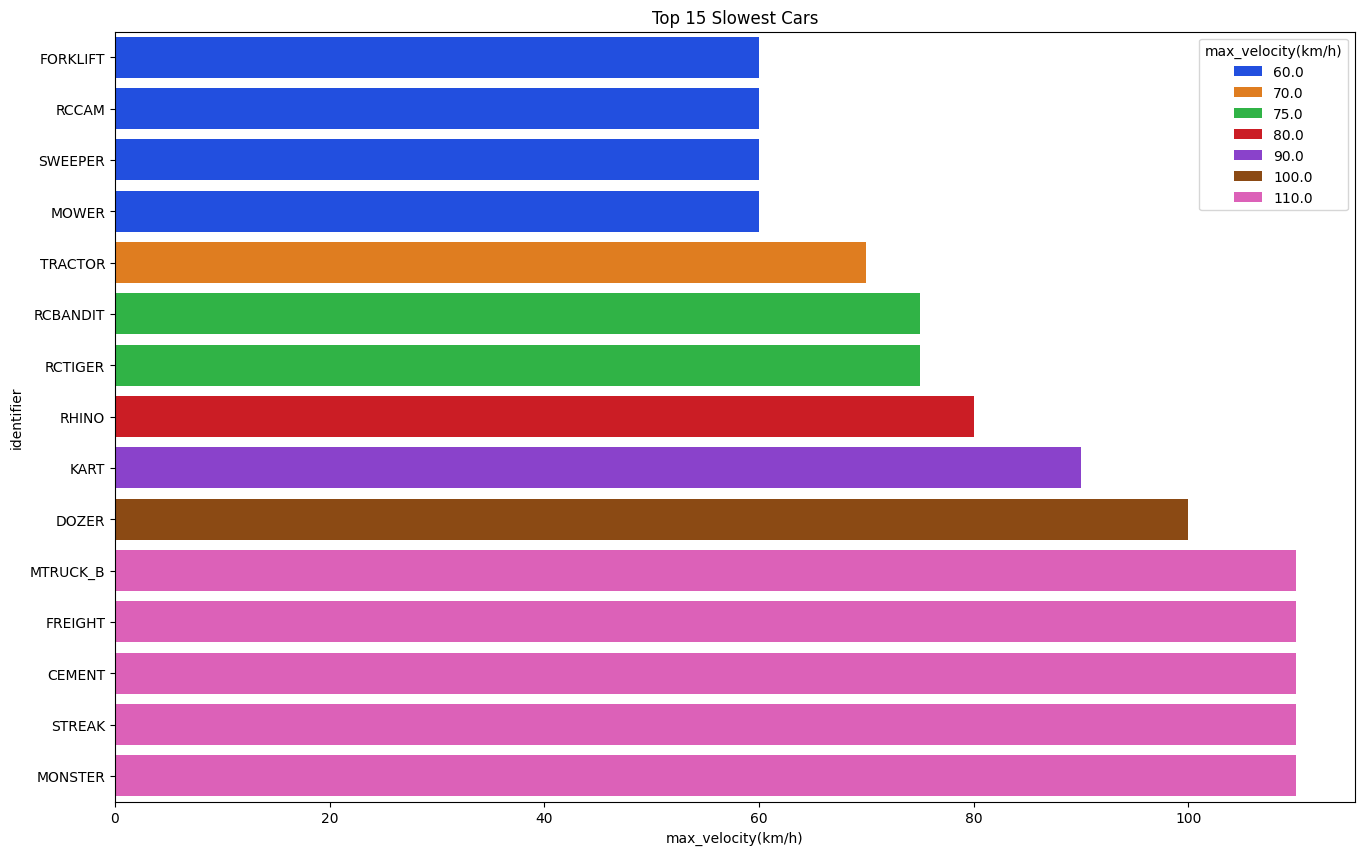

In [42]:
plt.figure(figsize=(16, 10))
sns.barplot(y='identifier', x='max_velocity(km/h)', hue='max_velocity(km/h)', data=slowest, palette='bright')
plt.title('Top 15 Slowest Cars')

Text(0.5, 1.0, 'Top 10 Acceleration')

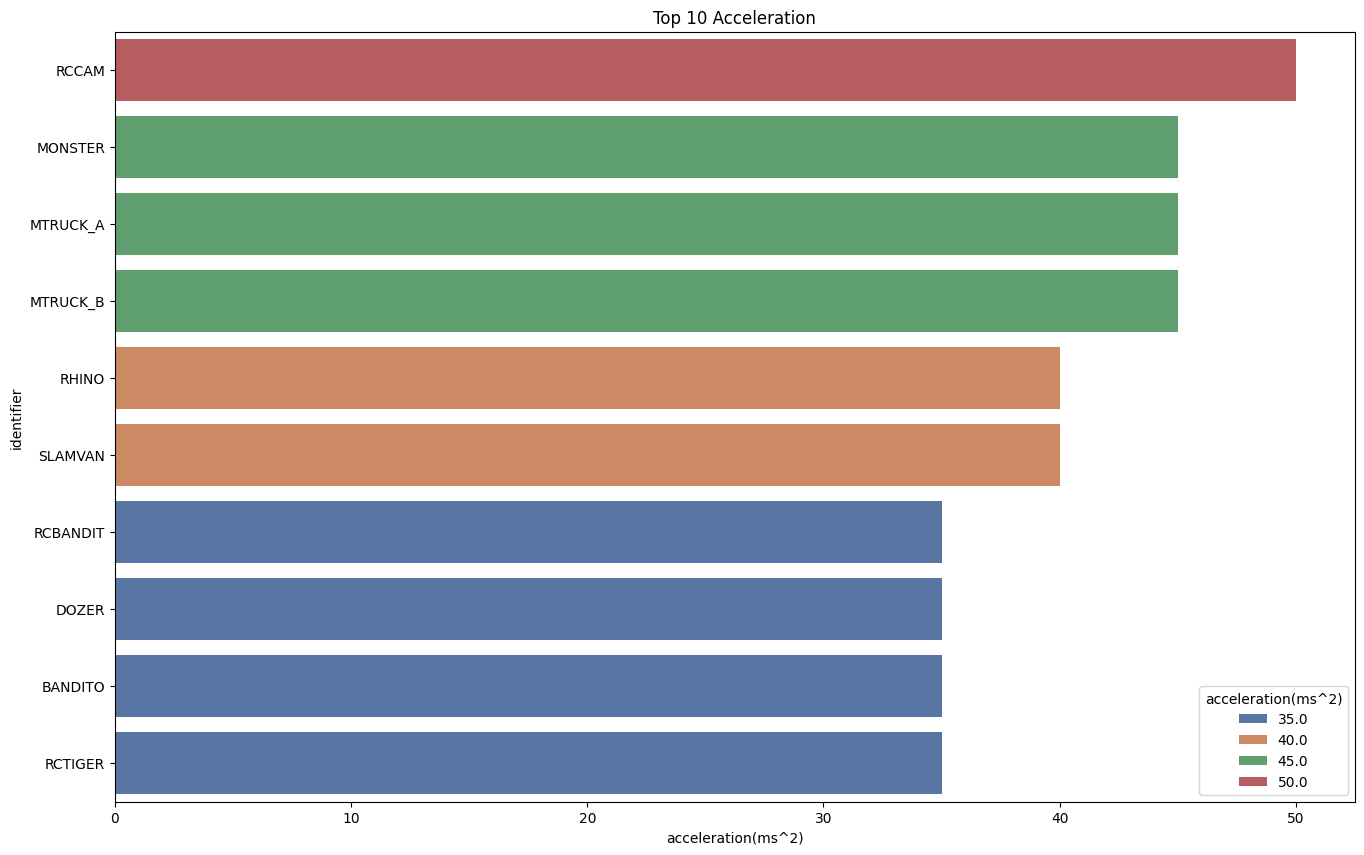

In [43]:
acceleration = df.sort_values(by='acceleration(ms^2)', ascending=False).head(10)
plt.figure(figsize=(16, 10))
sns.barplot(y='identifier', x='acceleration(ms^2)', hue='acceleration(ms^2)', data=acceleration, palette='deep')
plt.title('Top 10 Acceleration')

Text(0.5, 1.0, 'Top 10 Heaviest Vehicles')

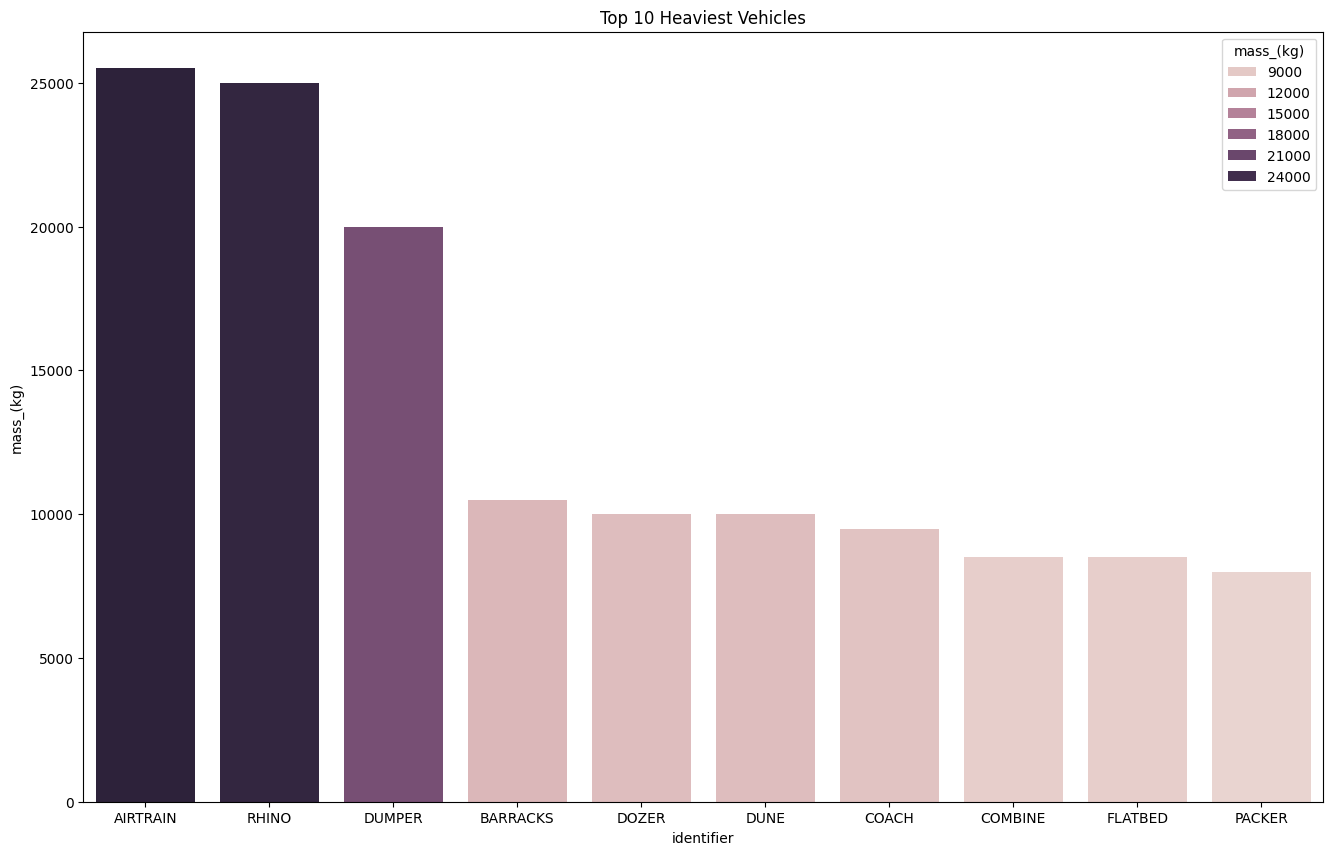

In [44]:
heaviest = df.sort_values(by='mass_(kg)', ascending=False).head(10)
plt.figure(figsize=(16, 10))
sns.barplot(x='identifier', y='mass_(kg)', hue='mass_(kg)', data=heaviest)
plt.title('Top 10 Heaviest Vehicles')

Text(0.5, 1.0, 'Top 10 Most Damage-Resistant Vehicles (Lower = Tougher)')

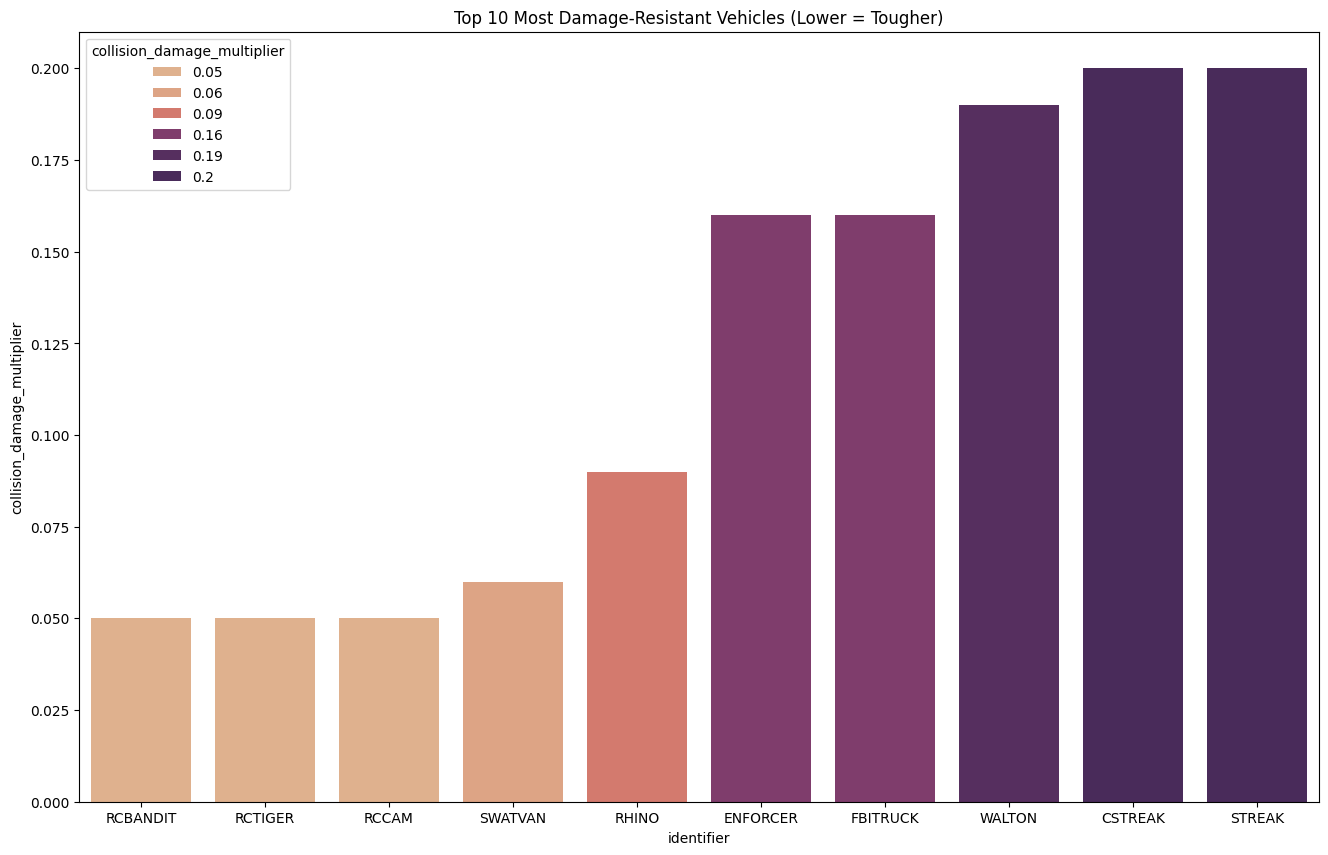

In [45]:
toughest = df.sort_values(by='collision_damage_multiplier', ascending=True).head(10)
plt.figure(figsize=(16, 10))
sns.barplot(x='identifier', y='collision_damage_multiplier', hue='collision_damage_multiplier', data=toughest, palette='flare')
plt.title('Top 10 Most Damage-Resistant Vehicles (Lower = Tougher)')

In [46]:
df.columns

Index(['identifier', 'mass_(kg)', 'turn_mass_(kg)', 'drag_multiplier',
       'center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z',
       'center_of_mass_%submerged', 'traction_multiplier', 'traction_loss',
       'traction_bias(%)', '#_of_gears', 'max_velocity(km/h)',
       'acceleration(ms^2)', 'interia', 'drive_type', 'engine_type',
       'brakes_deceleration(ms^2)', 'brakes_bias(%)', 'abs',
       'steering_lock_(°)', 'suspension_force_level',
       'suspension_damping_level', 'suspension_high_speed_com_damping',
       'suspension_lines_upper_limit', 'suspension_lines_lower_limit',
       'suspension_lines_bias_between_front_and_rear',
       'suspension_anti-dive_multiplier', 'seat_offset_distance',
       'collision_damage_multiplier', 'monetary_value_($)', 'model_flags',
       'handling_flags', 'lights_front', 'lights_rear', 'lights_anim_group'],
      dtype='object')

Text(0.5, 1.0, 'Car Price vs Top Speed')

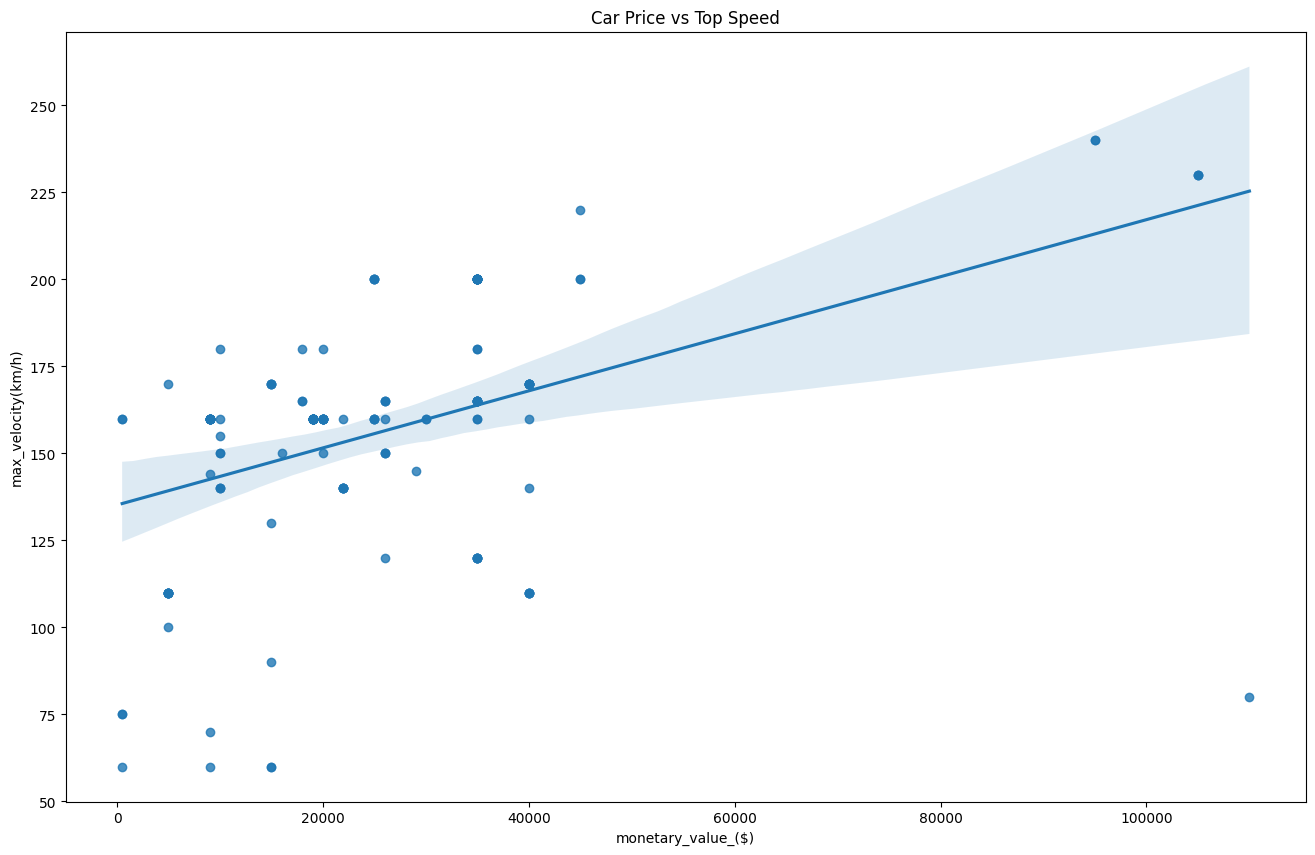

In [47]:
plt.figure(figsize=(16, 10))
sns.regplot(x='monetary_value_($)', y='max_velocity(km/h)', data=df)
plt.title('Car Price vs Top Speed')

Text(0.5, 1.0, 'Car Price vs Acceleration')

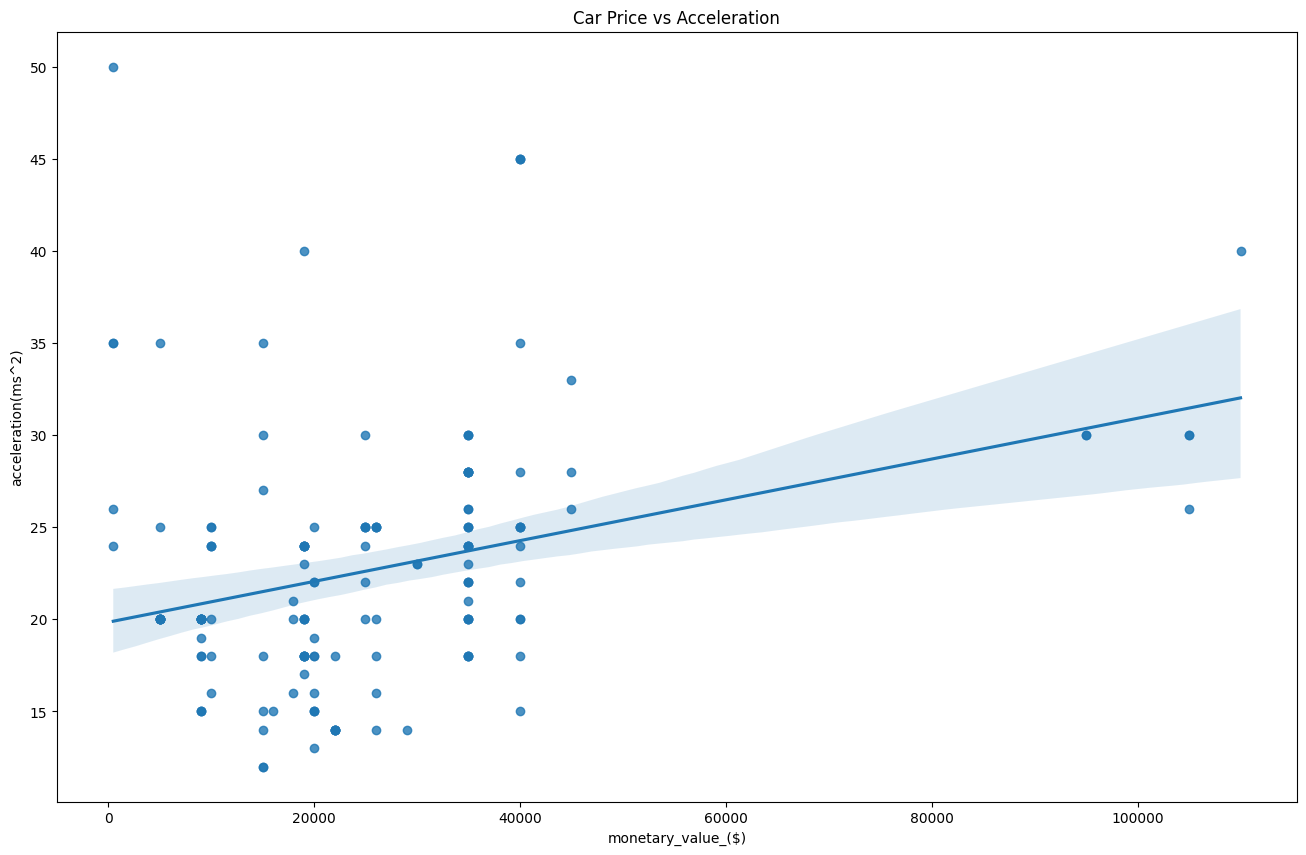

In [48]:
plt.figure(figsize=(16, 10))
sns.regplot(x='monetary_value_($)', y='acceleration(ms^2)', data=df)
plt.title('Car Price vs Acceleration')

Text(0.5, 1.0, 'Are heavier vehicles more durable?')

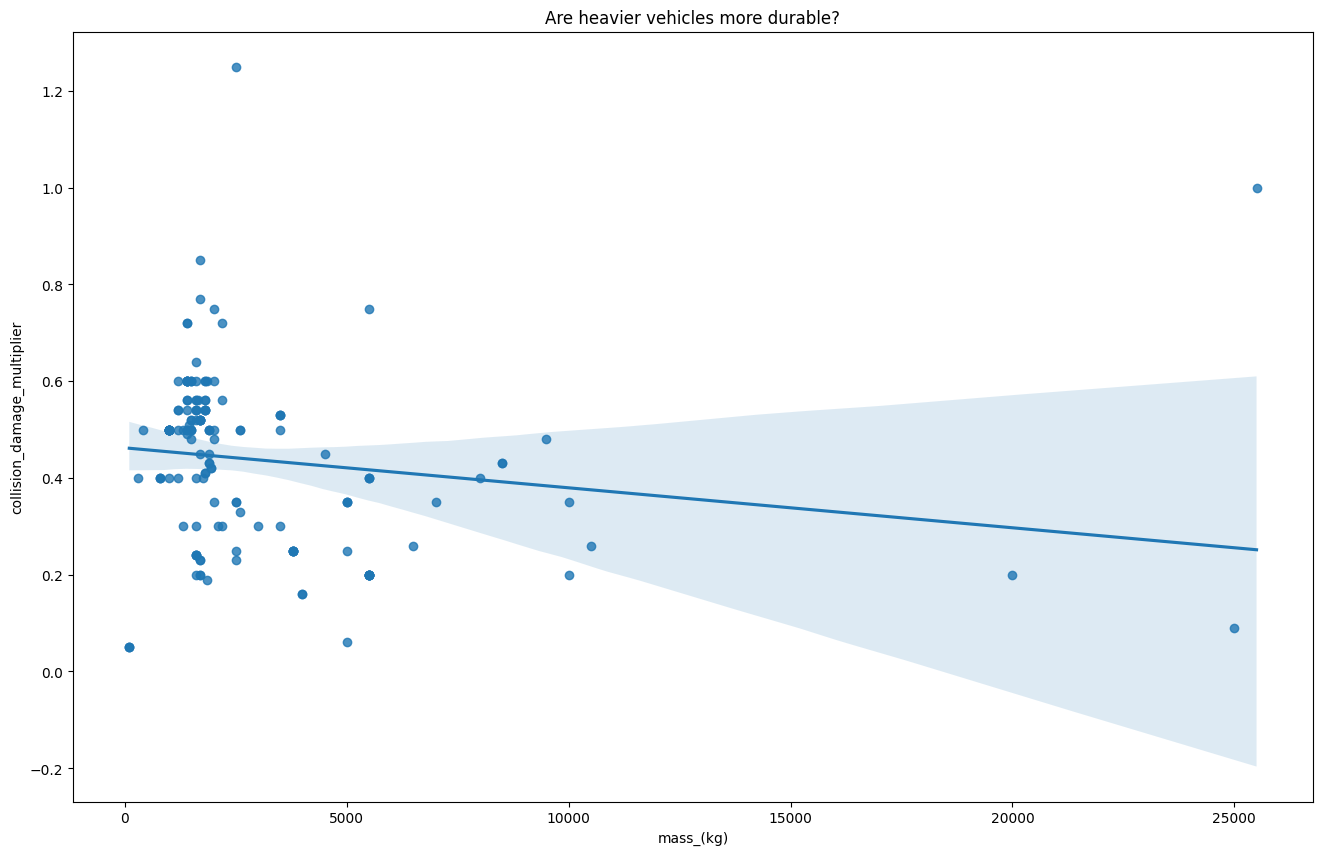

In [49]:
plt.figure(figsize=(16, 10))
sns.regplot(x='mass_(kg)', y='collision_damage_multiplier', data=df)
plt.title('Are heavier vehicles more durable?')

Text(0.5, 1.0, 'Top Speed vs Acceleration')

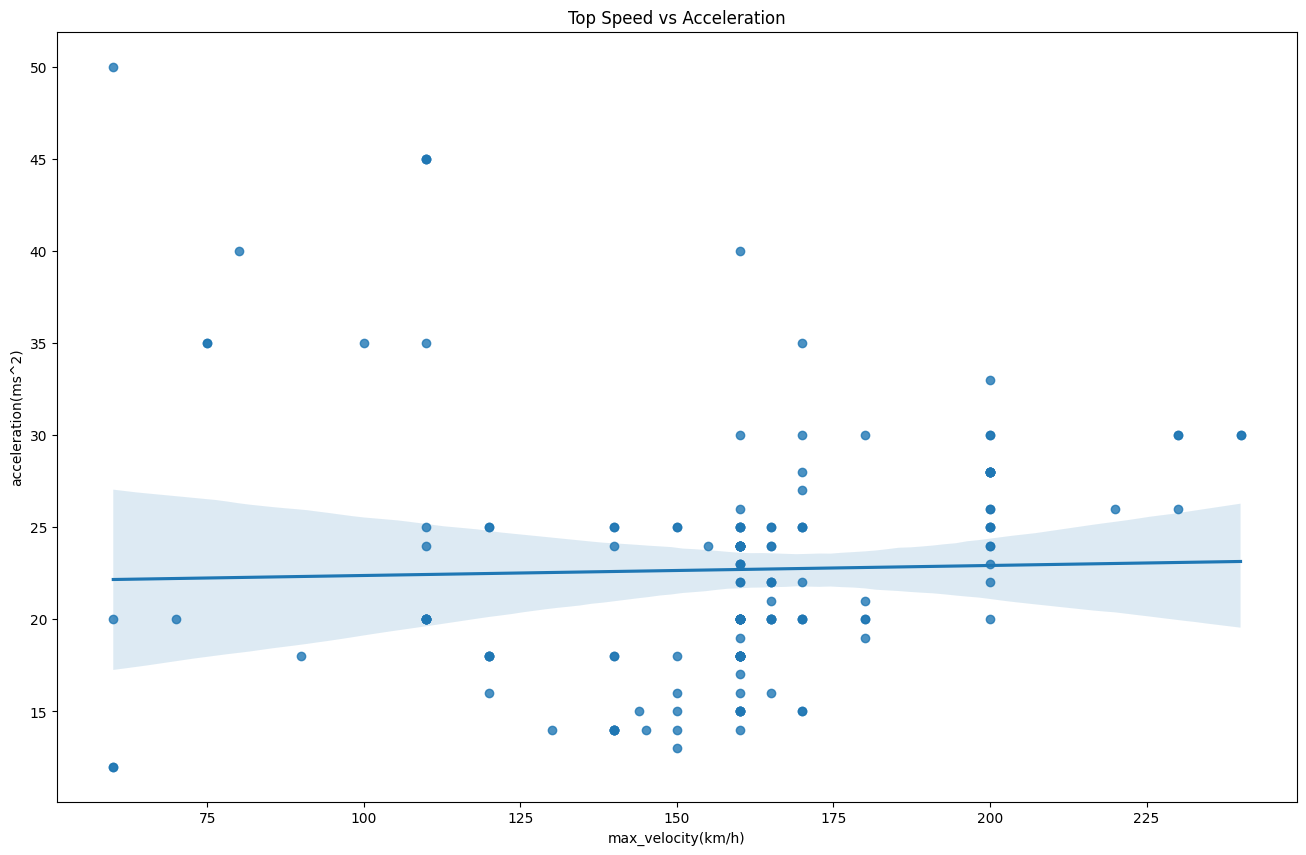

In [50]:
plt.figure(figsize=(16, 10))
sns.regplot(x='max_velocity(km/h)', y='acceleration(ms^2)', data=df)
plt.title('Top Speed vs Acceleration')